## Estadística Inferencial

Se llama estadística inferencial a la rama de la Estadística encargada de hacer deducciones, es decir, inferir propiedades, conclusiones y tendencias, a partir de una muestra del conjunto. Su papel es interpretar, hacer proyecciones y comparaciones.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import random
import pickle

import scipy
from scipy import stats

In [ ]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scipy=={scipy.__version__}")

### Distribución

Una distribución es una función que muestra los posibles valores para una variable y con que frecuencia ocurren.


**Ejemplo 1**:

Podemos crear una distribución usando los posibles valores que aparecen al lanzar un dado de 6 caras, estos serían los numeros del 1 al 6. Como solo hay 6 posibles valores y son independientes entre ellos, podemos decir que la probabilidad de que salga un número es de 1/6.

Esto lo podemos representar en una gráfica.

In [ ]:
probabilidades = np.ones(6)/6

probabilidades

In [ ]:
plt.bar(range(1, 7), probabilidades)
plt.show()

**Esta distribución en particular se le conoce como _Distribución Uniforme_ porque todos los valores son el mismo.**

**Ejemplo 2**:

Supongamos que ahora tenemos 2 dados, queremos ver cuales son los posibles resultados:

- El menor valor de lanzar 2 dados sería: 2.
- El mayor valor de lanzar 2 dados sería: 12.

In [ ]:
# Posibles resultados

resultados = list()

for i in range(1, 7):
    for j in range(1, 7):
        resultados.append((i, j))
        
resultados

In [ ]:
resultados_suma = [sum(res) for res in resultados]

conteo = Counter(resultados_suma)

for valor, cont in conteo.items():
    print(f"Valor: {valor}\t Conteo: {cont}\t Probabilidad: {cont/len(resultados)}")

**Podemos calcular la probabilidad de que suceda diviendo entre el total de posibilidades, en este caso son 36.**

Ahora con estos valores podemos mostrar una distribución de probabilidades.

In [ ]:
probabilidad = [c/36 for c in conteo.values()]

plt.bar(conteo.keys(), probabilidad)

plt.show()

### Distribución Normal

La distribución normal (distribución gaussiana o distribución de campana) es una distribución que tiene la característica de:

$$media = mediana = moda$$

In [ ]:
# Vamos a generar una lista de 10_000 números aleatorios con media 0 y std 1
x = np.random.normal(loc = 0, scale = 1, size = 10_000)

# Distribución
sns.histplot(x, color = "magenta", kde = True)

plt.grid()
plt.show()

In [ ]:
print(f"Media: {np.mean(x)}")
print(f"Mediana: {np.median(x)}")

**Un ejemplo de una distribución normal es el tablero de Galton.**

In [ ]:
def galton_board(num_slots, num_balls):
    balls = []

    for _ in range(num_balls):
        position = num_slots // 2
        for _ in range(num_slots - 1):
            direction = random.choice([-1, 1])
            position = (position + direction) % num_slots
            balls.append(position)

    return balls

x = galton_board(100,10_000)

In [ ]:
plt.figure(figsize = (12, 7.5))

sns.histplot(x, bins=75)

plt.grid()
plt.show()

### Estandarización

La estandarización es el proceso de transformación de una variable con **media != 0** y con **std != 1** a **media == 0** y **std == 1**. Este proceso es muy útil cuando necesitamos comparar distribuciones de dos conjuntos de datos diferentes, ya que estaremos transformando ambas a una misma escala sin perder ninguna de las propiedades.

Para esto, debemos transformar cada valor, siguiendo la siguiente formula: 

$$z = \frac{x_{i} - \overline{x}}{\sigma_{x}} = \frac{x_{i} - mean(x)}{std(x)}$$

**Todas las distribuciones pueden ser estandarizadas.**

In [ ]:
sample = random.sample(x, k = 40)
print(sample)

In [ ]:
print(f"Media: {np.mean(sample)}")
print(f"Mediana: {np.median(sample)}")
print(f"Moda: {stats.mode(sample)[0]}")

print(f"std: {np.std(sample)}")

In [ ]:
media = np.mean(sample)

std = np.std(sample)

resultados_estandar = [(x - media) / std for x in sample]

print(resultados_estandar)

In [ ]:
plt.figure(figsize = (8, 5))

# Eje X
plt.axhline(0, color = "black")

# Eje Y
plt.axvline(0, color = "black")

# Curva Original
sns.kdeplot(sample, color = "red", label = "Original")

# Curva Estandarizada
sns.kdeplot(resultados_estandar, color = "blue", label = "Estandar")

plt.legend()
plt.grid()
plt.show()

**Ahora la distribución esta centrada en 0, tiene media = mediana = moda = 0 y desviación estandar = 1.**

In [ ]:
print(f"Media: {np.mean(resultados_estandar)}")
print(f"Mediana: {np.median(resultados_estandar)}")
print(f"Moda: {stats.mode(resultados_estandar)[0]}")

print(f"std: {np.std(resultados_estandar)}")

### Teorema de Limite Central

Por lo general, trabajaremos con muestras de una población, estas muestras tendrán: media, mediana, moda, std, min, max...

El Teorema de limite central establece que, si tenemos suficientes muestras diferentes de una población, la distribución de sus medias seguirá una **distribución normal**. A la distribución de medias se le conoce como **distribución de medias muestrales**.

Además de que la media de las medias muestrales se aproximará más aún a la media de la población. Todo esto se puede inferir sin conocer la población.

In [ ]:
# Usaremos de ejemplo una lista de números no aleatorios

with open(file = "../Data/tlc.pkl", mode = "br") as file:
    tlc = pickle.load(file)
    
print(len(tlc))

In [ ]:
# Vamos a generar un conjunto de 20 muestras aleatorias de un número aleatorio de muestras

muestras = [random.sample(population = tlc, k = random.randint(150, 200)) for i in range(20)]

print(len(muestras))

# muestras[0]

In [ ]:
# Ahora calcularemos la media de cada muestra

medias_muestrales = [np.mean(x) for x in muestras] 

print(medias_muestrales)

In [ ]:
# Veamos como se distribuyen

sns.kdeplot(medias_muestrales, color = "magenta")

plt.grid()
plt.show()

In [ ]:
print(f"Media: {np.mean(medias_muestrales)}")
print(f"Mediana: {np.median(medias_muestrales)}")
print(f"Moda: {stats.mode(medias_muestrales)[0]}")

print(f"std: {np.std(medias_muestrales)}")

In [ ]:
# Ahora veremos la media del conjunto original (población)

np.mean(tlc)

In [ ]:
# Calculemos la diferencia

np.abs(np.mean(medias_muestrales) - np.mean(tlc))

# Si aumentamos el total de muestras o el tamaño de las muestras nos acercaremos más a la media de la población
# Si reducimos el total de muestras o el tamaño de las muestras nos alejaremos más a la media de la población

### Coeficiente de asimetría (Skewness)

Es una medida de la asimetría (falta de simetría) de un conjunto de datos numéricos $x_1, x_2, x_3... x_n$. 

El coeficiente de asimetría se define con la siguiente ecuación:

$$sk = \frac{1}{\sigma^3}\left(\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3\right) $$

El coeficiente de asimetría **no posee unidad de medición, es un número que puede ser positivo, negativo o cero.**

Su signo es positivo cuando la gráfica de frecuencias de los datos presenta una cola más alargada hacia la derecha de la media. 

En cambio, el signo del coeficiente de asimetría es negativo cuando la gráfica de frecuencias presenta una cola más alargada hacia la izquierda de la media.

<div align="center">
   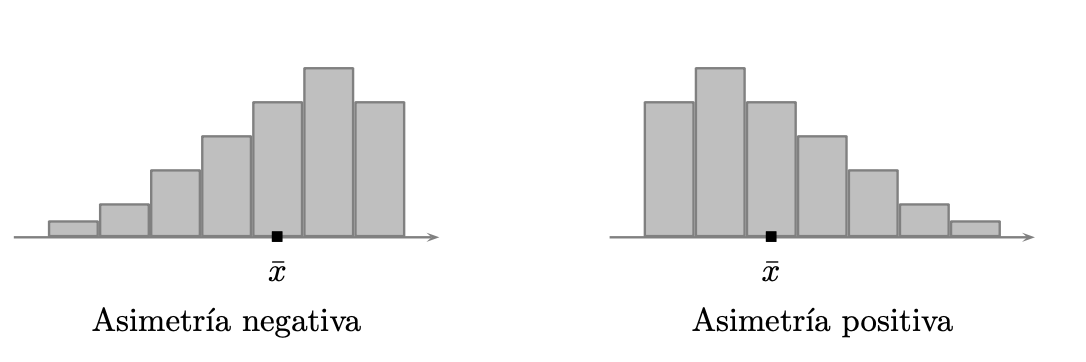
</div>

Por consiguiente, en el caso simétrico, cuando por cada dato $x_i$, a la izquierda de $\bar{x}$ hay otro dato a la derecha y a la misma distancia de este punto central, el coeficiente de asimetría es cero.

In [ ]:
# Usaremos la lista del teorema del limite central

sns.histplot(x = tlc, label = f"Skewness: {stats.skew(tlc)}")

plt.legend()
plt.grid()
plt.show()

### Curtosis (Kurtosis)

La curtosis es un número positivo que no tiene unidad de medición. Cuando una observación $x_i$ dista mucho de la media $\bar{x}$, al elevar esta distancia a la cuarta potencia  hace que se magnifiquen las distancias grandes, por lo tanto, una curtosis grande puede indicar un mayor número de datos alejados de la media, hacia uno u otro lado.

La curtorsis de una distribución normal estándar es igual a 3, la siguiente ecuación para calcular la kurtosis (llamada excess kurtosis) es:

$$k_3 = \frac{1}{s^4}\left(\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^4\right)-3$$

<div align="center">
   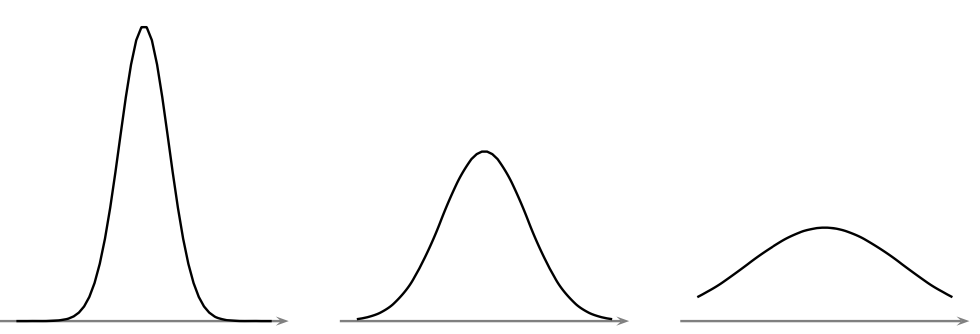
</div>

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera.
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.

In [ ]:
# Usaremos la lista del teorema del limite central

sns.kdeplot(x = tlc, label = f"Kurtosis: {stats.kurtosis(tlc)}")

plt.legend()
plt.grid()
plt.show()

### La Regla 68 - 95 - 99.7 (Regla Empírica/Regla de los Tres Sigmas)

En una distribución normal de media $\mu$ y desviación estándar $\sigma$:

- El **68%** de todas las observaciones se encuentran dentro del intervalo: $\mu \pm \sigma$


- El **95%** de todas las observaciones se encuentran dentro del intervalo: $\mu \pm 2\sigma$


- El **99.7%** de todas las observaciones se encuentran dentro del intervalo: $\mu \pm 3\sigma$

<div align="center">
   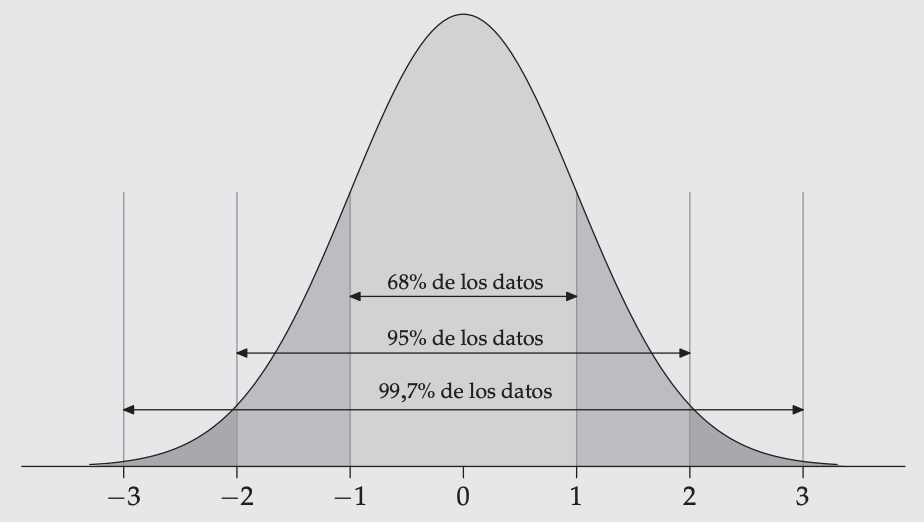
</div>

In [ ]:
# Vamos a hacer un ejemplo: 

# Vamos a utilizar la lista del teorema del limite central
# Hay que tener en cuenta que estos datos no representan una distribución normal
# Primero vamos a estandarizar los datos

media = np.mean(tlc)
std = np.std(tlc)

tlc_estandar = [(x - media) / std for x in tlc]

# Original
sns.kdeplot(tlc, color = "blue", label = "Original")

# Estandarizado
sns.kdeplot(tlc_estandar, color = "magenta", label = "Estandarizado")

plt.legend()
plt.grid()
plt.show()

In [ ]:
# Veamos la media y std de los datos estandarizados

media = np.mean(tlc_estandar)
std = np.std(tlc_estandar)

print(f"mean: {media}")
print(f"std: {std}")

In [ ]:
# Veamos la cantidad de elementos acotados en el 68%
# Los datos entre 𝜇 ± 𝜎

datos_acotados = [x for x in tlc_estandar if media - 1*std < x < media + 1*std]

print(f"Total de datos acotados: {len(datos_acotados)}")
print(f"Total de datos: {len(tlc_estandar)}")
print(f"Porcentaje: {len(datos_acotados)/len(tlc_estandar)*100}")

In [ ]:
# Veamos la cantidad de elementos acotados en el 95%
# Los datos entre 𝜇 ± 2𝜎

datos_acotados = [x for x in tlc_estandar if media - 2*std < x < media + 2*std]

print(f"Total de datos acotados: {len(datos_acotados)}")
print(f"Total de datos: {len(tlc_estandar)}")
print(f"Porcentaje: {len(datos_acotados)/len(tlc_estandar)*100}")

In [ ]:
# Veamos la cantidad de elementos acotados en el 99.7%
# Los datos entre 𝜇 ± 3𝜎

datos_acotados = [x for x in tlc_estandar if media - 3*std < x < media + 3*std]

print(f"Total de datos acotados: {len(datos_acotados)}")
print(f"Total de datos: {len(tlc_estandar)}")
print(f"Porcentaje: {len(datos_acotados)/len(tlc_estandar)*100}")

In [ ]:
# Veamos con una gráfica

# 𝜇 ± 1𝜎
plt.axvline(media + 1*std, color = "black", linestyle = "--", alpha = 0.25)
plt.axvline(media - 1*std, color = "black", linestyle = "--", alpha = 0.25)

# 𝜇 ± 2𝜎
plt.axvline(media + 2*std, color = "black", linestyle = "--", alpha = 0.50)
plt.axvline(media - 2*std, color = "black", linestyle = "--", alpha = 0.50)

# 𝜇 ± 3𝜎
plt.axvline(media + 3*std, color = "black", linestyle = "--", alpha = 0.75)
plt.axvline(media - 3*std, color = "black", linestyle = "--", alpha = 0.75)

# Estandarizado
sns.kdeplot(tlc_estandar, color = "magenta")

plt.grid(alpha = 0.2)
plt.show()

In [ ]:
################################################################################################################################